In [1]:
#importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')


In [2]:
#read csv file and convert into dataframe

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')



In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns

data.shape

(1338, 7)

In [5]:
#checking null values in the dataset

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#statistic information of the dataset

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


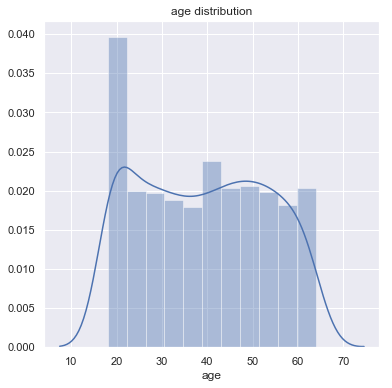

In [8]:
#data visualizing


sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('age distribution')
plt.show()

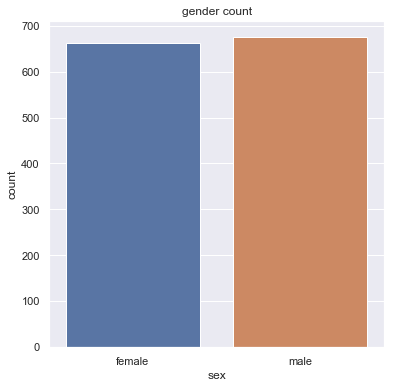

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['sex'])
plt.title('gender count')
plt.show()

In [10]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

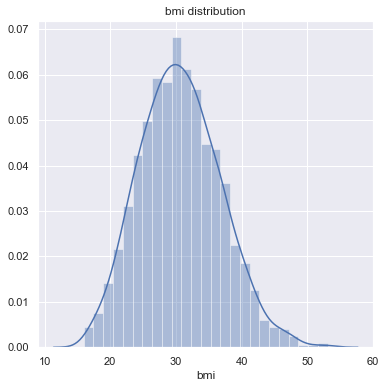

In [11]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('bmi distribution')
plt.show()

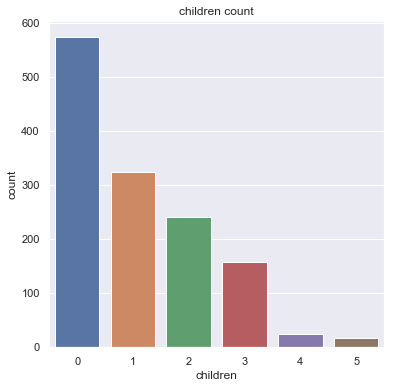

In [12]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['children'])
plt.title('children count')
plt.show()

In [13]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

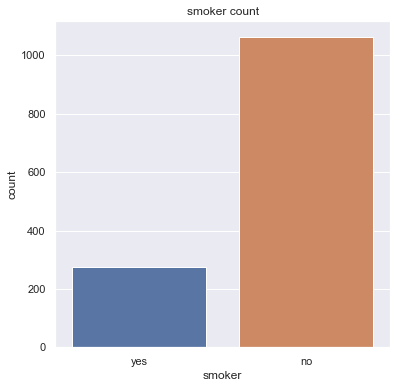

no     1064
yes     274
Name: smoker, dtype: int64

In [14]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(data['smoker'])
plt.title('smoker count')
plt.show()

data['smoker'].value_counts()

In [15]:
#converting categorical data into numerical data

data['sex']=data['sex'].replace({'male':1,'female':0})

data['smoker']=data['smoker'].replace({'yes':1,'no':0})

In [16]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
data['region']=data['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [19]:
#separting features and labels

X=data.drop(['charges'],axis=1)
y=data['charges']

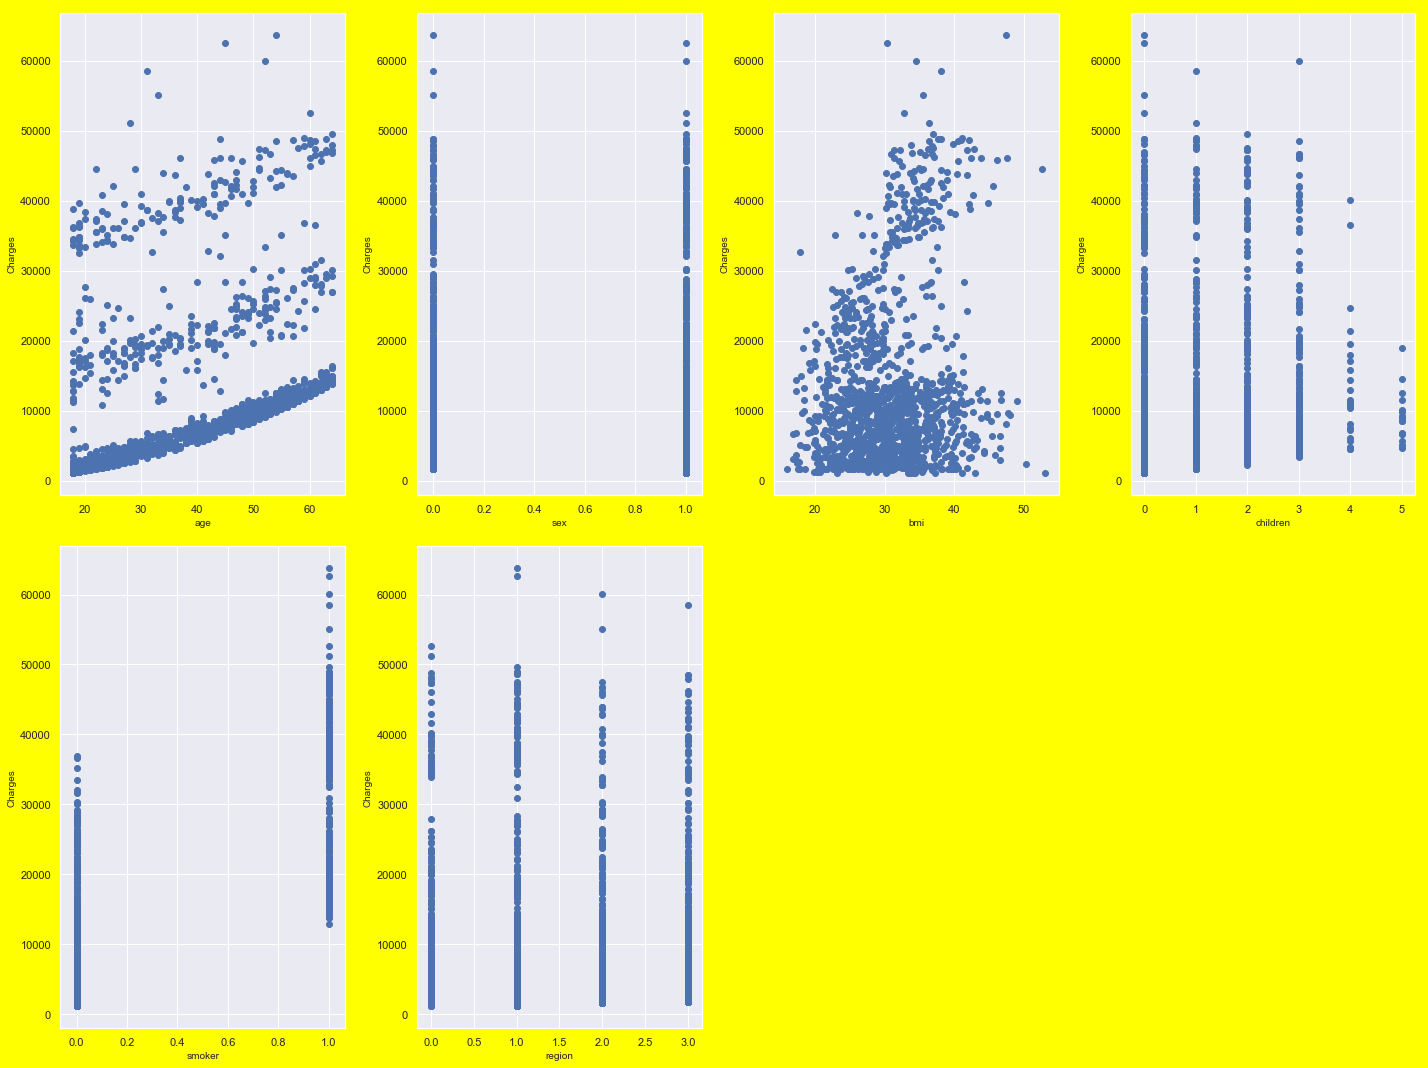

In [20]:
#visualizzing relationship of features with label

plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber= 1

for column in X:
    if plotnumber <= 8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Charges',fontsize=10)
        
        
    plotnumber+=1
plt.tight_layout()


#infernce from the plot- no. of children does not affect the charges

In [30]:
x=data.drop(['charges'],axis=1)
y=data['charges']

In [31]:
#scaling the data
scaler=StandardScaler()

X_scaled= scaler.fit_transform(X)

In [32]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,y,test_size= 0.25,random_state=348)

In [33]:
regression=LinearRegression()

regression.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
#checking model on traing data

regression.score(x_train,y_train)

0.7533808060963387

In [35]:
#checking test score

regression.score(x_test,y_test)

0.7356608993918592

In [36]:
print('Charges of insurance : ',regression.predict(scaler.transform([[46,0,33.44,1,0,1]])))

Charges of insurance :  [11110.59495476]
